About Dataset

There has been a revenue decline in the Portuguese Bank and they would like to know what actions to take. After investigation, they found that the root cause was that their customers are not investing enough for long term deposits. So the bank would like to identify existing customers that have a higher chance to subscribe for a long term deposit and focus marketing efforts on such customers.

Data Set Information
The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed ('yes') or not ('no') subscribed.

There are two datasets: train.csv with all examples (32950) and 21 inputs including the target feature, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

test.csv which is the test data that consists of 8238 observations and 20 features without the target feature

Goal:- The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).



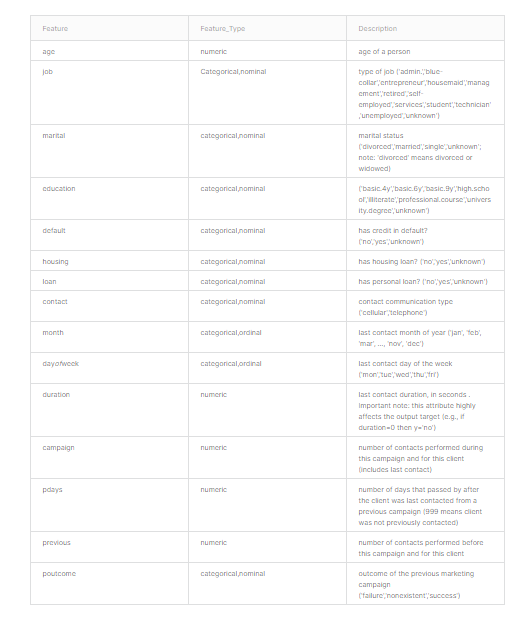

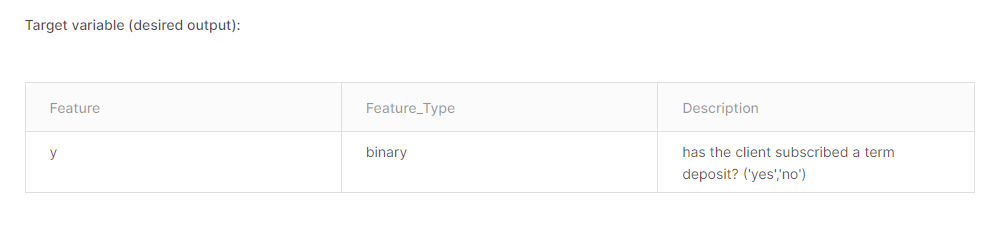

In [3]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
#import data modelling libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score,RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,classification_report,roc_auc_score,plot_roc_curve

In [5]:
#load the dataset
df = pd.read_csv('new_train.csv')

#check shape of the dataset
print("shape of the data : ",df.shape)
df.head()

shape of the data :  (32950, 16)


age           job   marital          education  default housing loan  \
0   49   blue-collar   married           basic.9y  unknown      no   no   
1   37  entrepreneur   married  university.degree       no      no   no   
2   78       retired   married           basic.4y       no      no   no   
3   36        admin.   married  university.degree       no     yes   no   
4   59       retired  divorced  university.degree       no      no   no   

     contact month day_of_week  duration  campaign  pdays  previous  \
0   cellular   nov         wed       227         4    999         0   
1  telephone   nov         wed       202         2    999         1   
2   cellular   jul         mon      1148         1    999         0   
3  telephone   may         mon       120         2    999         0   
4   cellular   jun         tue       368         2    999         0   

      poutcome    y  
0  nonexistent   no  
1      failure   no  
2  nonexistent  yes  
3  nonexistent   no  
4  nonexistent   no

In [6]:
#check the data-types of all columns
df.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

In [7]:
#info check for all variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


check missing data

One of the main steps in data preprocessing is handling missing data. Missing data means absence of observations in columns that can be caused while procuring the data, lack of information, incomplete results etc. Feeding missing data to your machine learning model could lead to wrong prediction or classification. Hence it is necessary to identify missing values and treat them.

In [8]:
#check for missing data
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [9]:
#statistical analysis of dataset
df.describe()

age      duration      campaign         pdays      previous
count  32950.000000  32950.000000  32950.000000  32950.000000  32950.000000
mean      40.014112    258.127466      2.560607    962.052413      0.174719
std       10.403636    258.975917      2.752326    187.951096      0.499025
min       17.000000      0.000000      1.000000      0.000000      0.000000
25%       32.000000    103.000000      1.000000    999.000000      0.000000
50%       38.000000    180.000000      2.000000    999.000000      0.000000
75%       47.000000    319.000000      3.000000    999.000000      0.000000
max       98.000000   4918.000000     56.000000    999.000000      7.000000

<AxesSubplot:>

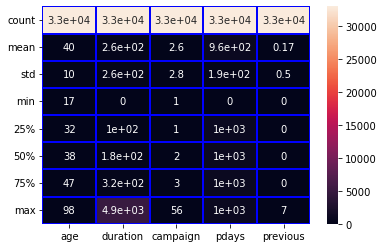

In [10]:
#plotting df.describe in graphical method
sns.heatmap(df.describe(),annot=True,linecolor='blue',linewidths=2)

In [11]:
#check for class imbalance
df['y'].value_counts()

no     29238
yes     3712
Name: y, dtype: int64

Text(0.5, 1.0, 'target variable')

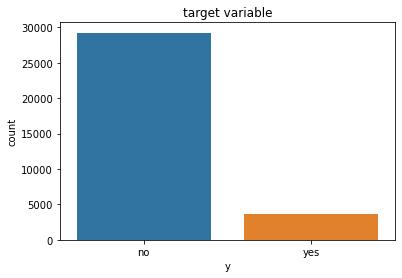

In [12]:
sns.countplot(df['y'])
plt.title("target variable")

In [13]:
#percentage of class present in target variable
print("percentage of NO and YES\n",df['y'].value_counts()/len(df)*100)

percentage of NO and YES
 no     88.734446
yes    11.265554
Name: y, dtype: float64


Exploratory Data Analysis

In [14]:
# indentifying the categorical variables
cat_var = df.select_dtypes(include=['object']).columns
print(cat_var)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


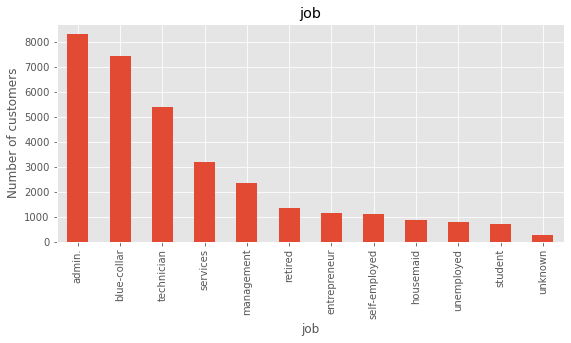

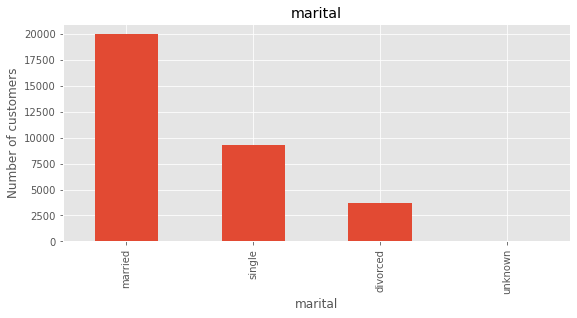

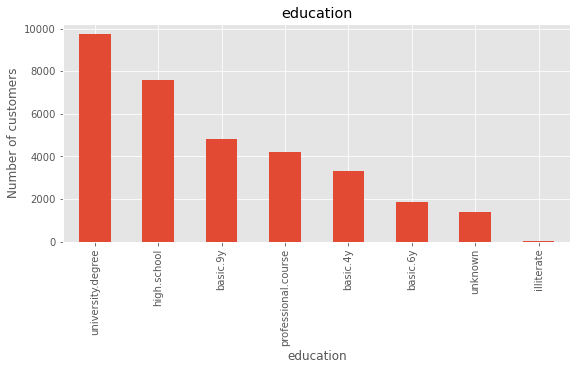

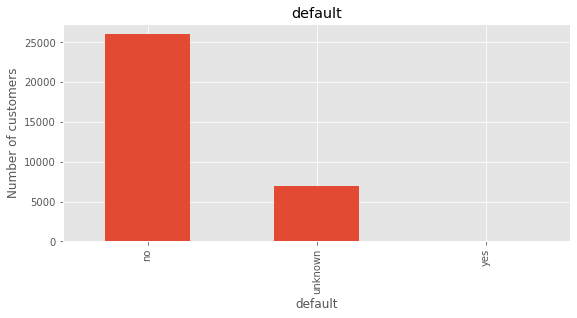

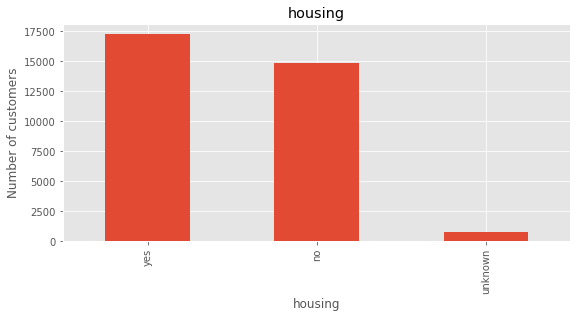

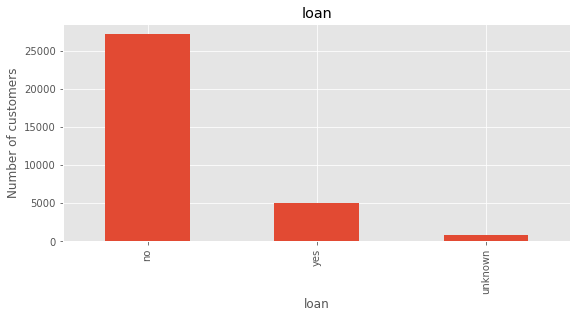

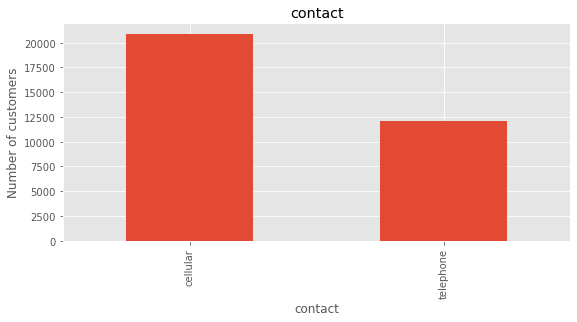

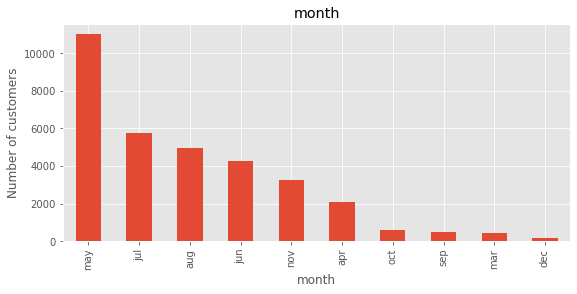

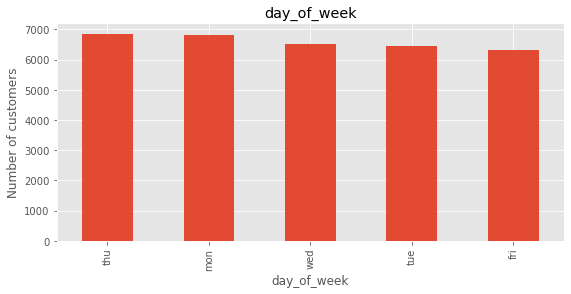

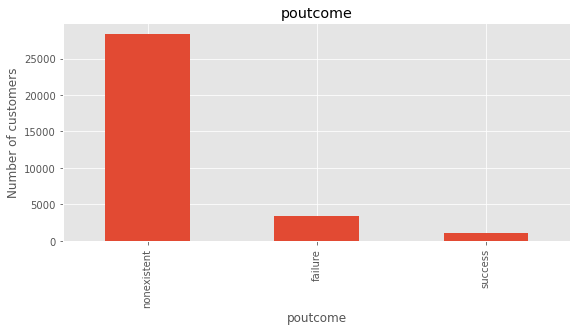

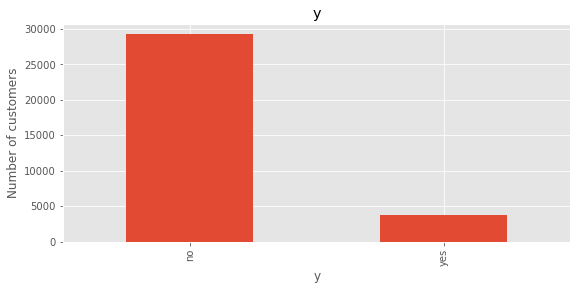

In [15]:
plt.style.use("ggplot")

for col in cat_var:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    df[col].value_counts().plot(kind='bar')
    plt.xlabel(col)
    plt.ylabel("Number of customers")
    plt.title(col)

Observations :
The top three professions that our customers belong to are - administration, blue-collar jobs and technicians.

A huge number of the customers are married.

Majority of the customers do not have a credit in default

Many of our past customers have applied for a housing loan but very few have applied for personal loans.

Cell-phones seem to be the most favoured method of reaching out to customers.

Many customers have been contacted in the month of May.

The plot for the target variable shows heavy imbalance in the target variable.

The missing values in some columns have been represented as unknown. unknown represents missing data.

In [16]:
# replacing 'unknown' with the mode
for column in cat_var:
    mode = df[column].mode()[0]
    df[column] = df[column].replace("unknown",mode)

Distriburion of data using count plot after removing variable called 'unknown'

<AxesSubplot:xlabel='housing', ylabel='count'>

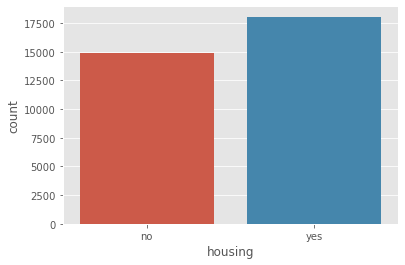

In [17]:
sns.countplot(df['housing'])

<AxesSubplot:xlabel='loan', ylabel='count'>

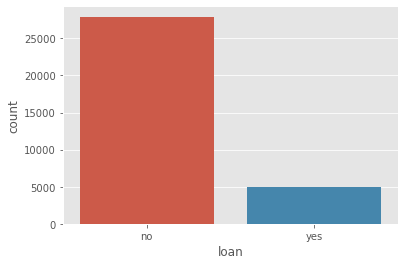

In [18]:
sns.countplot(df['loan'])

<AxesSubplot:xlabel='job', ylabel='count'>

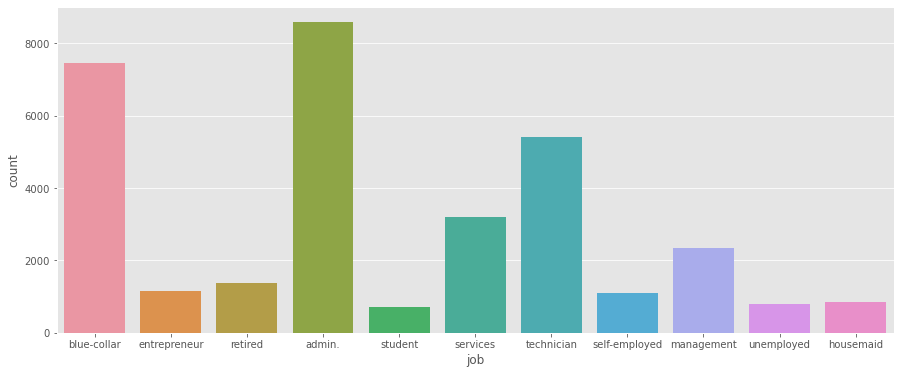

In [19]:
plt.figure(figsize=(15,6))
sns.countplot(df['job'])

<AxesSubplot:xlabel='marital', ylabel='count'>

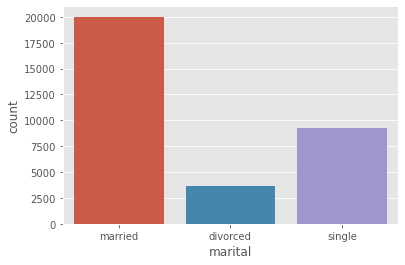

In [20]:
sns.countplot(df['marital'])

Univariate analysis of numerical columns

In [21]:
#identifying numerical variables
num_var = df.select_dtypes(include=['number']).columns
num_var

Index(['age', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

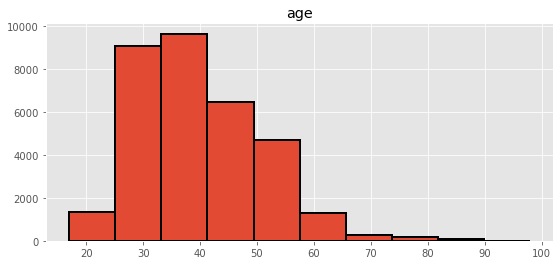

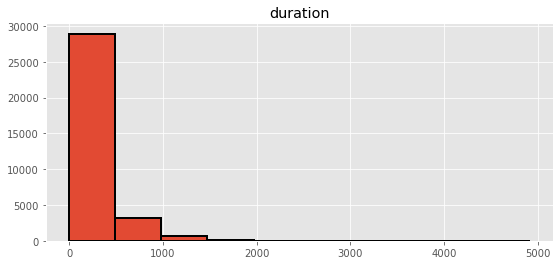

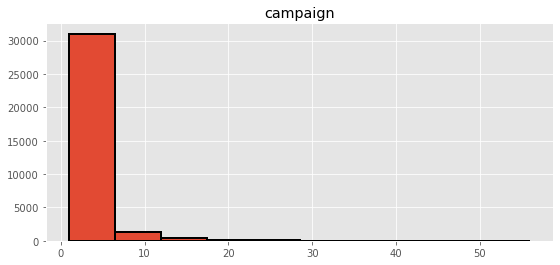

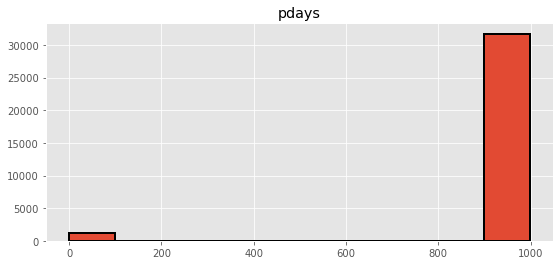

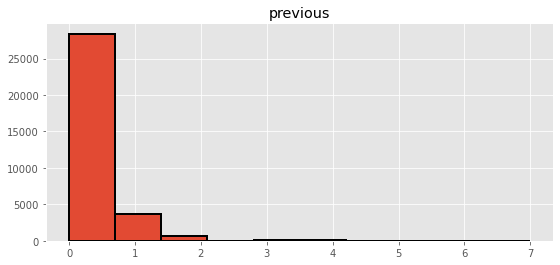

In [22]:
#plotting histogram for numerical variables
plt.style.use("ggplot")

for c in num_var:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    plt.hist(df[c],edgecolor='black',linewidth=2)
    plt.title(c)

Observation :
As we can see from the histogram, the features age, duration and campaign are heavily skewed and this is due to the presence of outliers as seen in the boxplot for these features.

Looking at the plot for pdays, we can infer that majority of the customers were being contacted for the first time because as per the feature description for pdays the value 999 indicates that the customer had not been contacted previously.

Since pdays and previous consist majorly only of a single value, their variance is quite less and hence we can drop them since technically will be of no help in prediction.

In [23]:
df.drop(['pdays','previous'],axis=1,inplace=True)

In [24]:
df.head()

age           job   marital          education default housing loan  \
0   49   blue-collar   married           basic.9y      no      no   no   
1   37  entrepreneur   married  university.degree      no      no   no   
2   78       retired   married           basic.4y      no      no   no   
3   36        admin.   married  university.degree      no     yes   no   
4   59       retired  divorced  university.degree      no      no   no   

     contact month day_of_week  duration  campaign     poutcome    y  
0   cellular   nov         wed       227         4  nonexistent   no  
1  telephone   nov         wed       202         2      failure   no  
2   cellular   jul         mon      1148         1  nonexistent  yes  
3  telephone   may         mon       120         2  nonexistent   no  
4   cellular   jun         tue       368         2  nonexistent   no

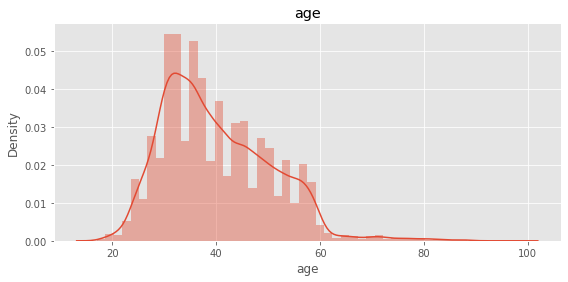

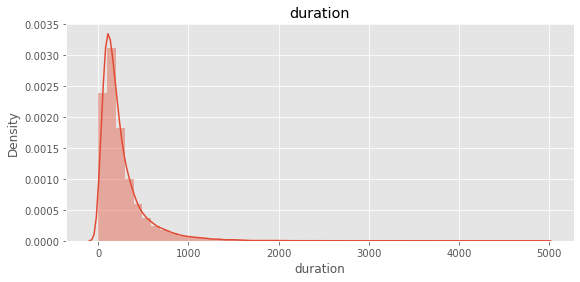

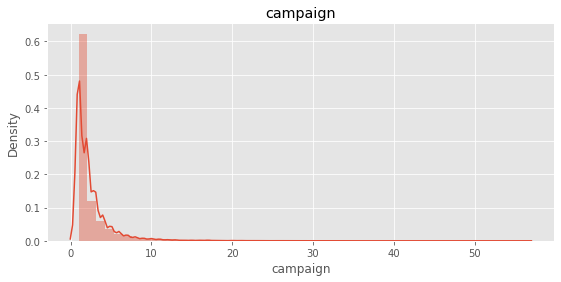

In [25]:
#plotting distplot for numerical variables
plt.style.use("ggplot")

for c in df.select_dtypes(include=['number']):
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.distplot(df[c])
    plt.title(c)

Bivariate analysis 

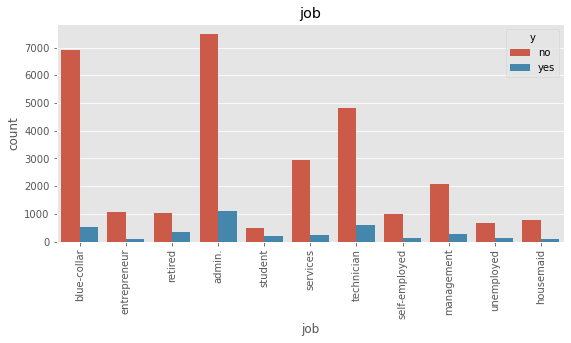

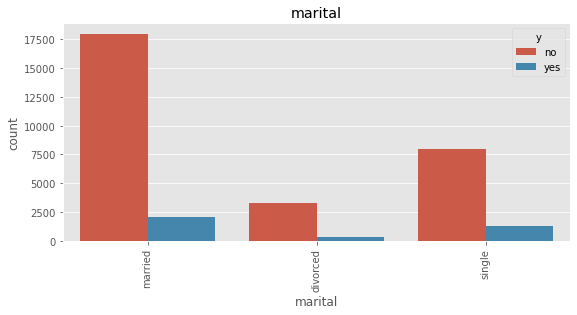

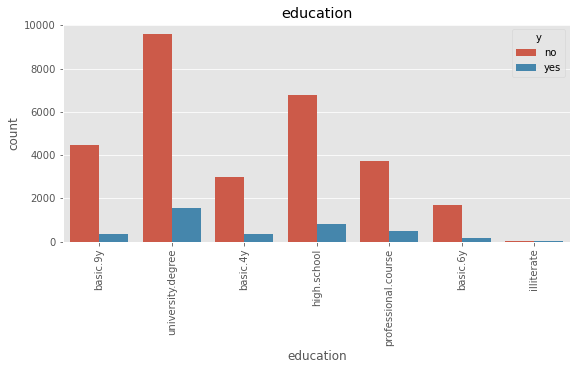

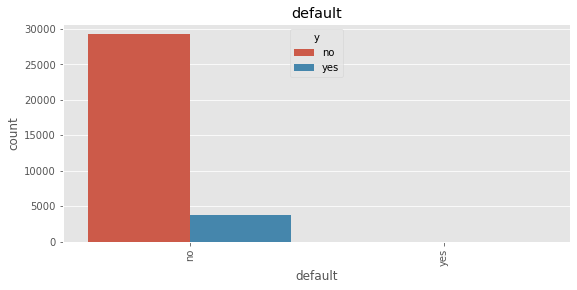

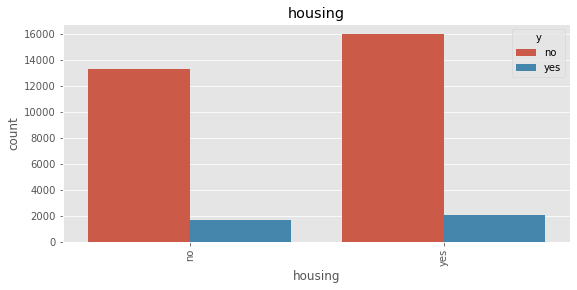

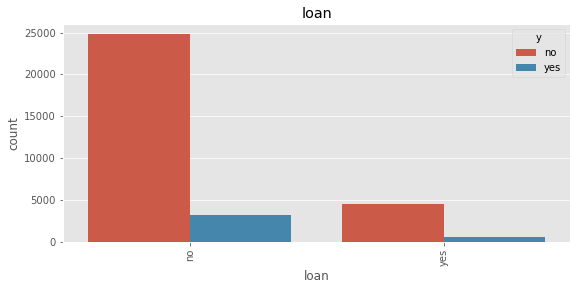

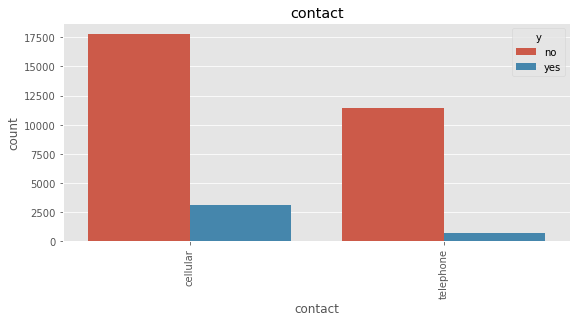

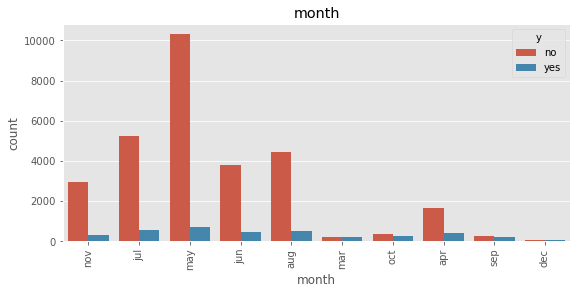

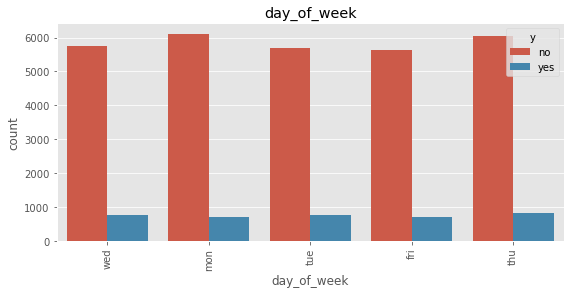

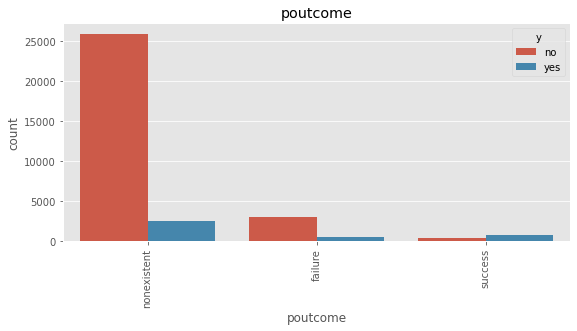

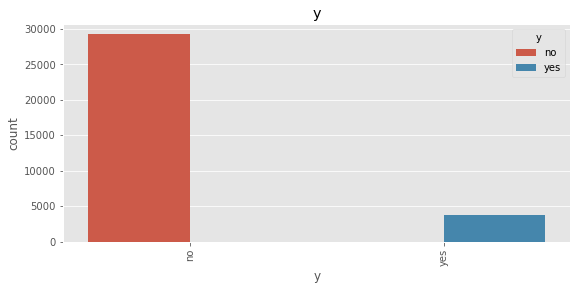

In [26]:
plt.style.use("ggplot")
for c in df.select_dtypes(include=['object']):
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(df[c],hue=df['y'])
    plt.title(c)
    plt.xticks(rotation=90)

Observations:
Customers having administrative jobs form the majority amongst those who have subscirbed to the term deposit.

They are married

They hold a university degree

They do not hold a credit in default

Housing loan doesn't seem a priority to check for since an equal number of customers who have and have not subscribed to it seem to have subscribed to the term deposit.

Cell-phones should be the preferred mode of contact for contacting customers.

Handling Outliers

Outliers cause significant impact on the Mean and Variance.It becomes necessary to treat the outliers.



<AxesSubplot:xlabel='age'>

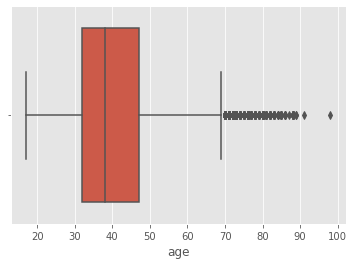

In [27]:
#plotting boxplot for checking for outliers

sns.boxplot(df['age'])

<AxesSubplot:xlabel='duration'>

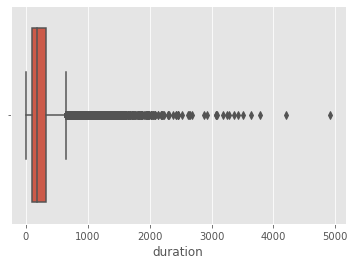

In [28]:
sns.boxplot(df['duration'])

<AxesSubplot:xlabel='campaign'>

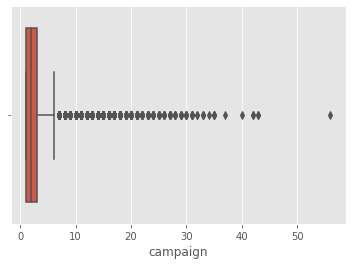

In [29]:
sns.boxplot(df['campaign'])

age duration and campaign are skewed towards right, we will compute the IQR and replace the outliers with the lower and upper boundaries



In [30]:
#compute interquantile range to calculate the boundaries
lower_boundries = []
upper_boundries = []
for i in ['age','duration','campaign']:
    IQR = df[i].quantile(0.75) - df[i].quantile(0.25)
    lower_bound = df[i].quantile(0.25) - (1.5*IQR)
    upper_bound = df[i].quantile(0.75) + (1.5*IQR)
    print(i,":",lower_bound, ",", upper_bound)
    lower_boundries.append(lower_bound)
    upper_boundries.append(upper_bound)

age : 9.5 , 69.5
duration : -221.0 , 643.0
campaign : -2.0 , 6.0


In [31]:
#replace all outliers which is greater then upper boundary by upper boundary
j = 0
for i in ['age','duration','campaign']:
    df.loc[df[i] > upper_boundries[j],i] = int(upper_boundries[j])
    j = j + 1

Since,

for age the lower boundary (9.5) < minimum value (17

for duration and campaigh the lower boundaries are negative (-221.0), (-2.0) resp.

replacing outliers with the lower boundary is not required

In [32]:
df.describe()

age      duration      campaign
count  32950.000000  32950.000000  32950.000000
mean      39.929894    234.923915      2.271077
std       10.118566    176.854558      1.546302
min       17.000000      0.000000      1.000000
25%       32.000000    103.000000      1.000000
50%       38.000000    180.000000      2.000000
75%       47.000000    319.000000      3.000000
max       69.000000    643.000000      6.000000

In [33]:
#plotting boxplot after removing the outliers

<AxesSubplot:xlabel='age'>

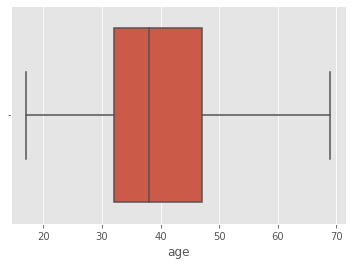

In [34]:
sns.boxplot(df['age'])

<AxesSubplot:xlabel='duration'>

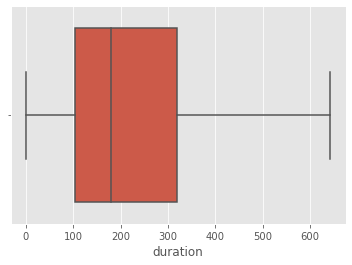

In [35]:
sns.boxplot(df['duration'])

<AxesSubplot:xlabel='campaign'>

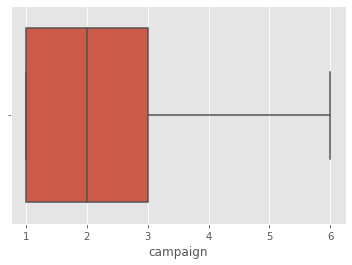

In [36]:
sns.boxplot(df['campaign'])

After replacing the outliers with the upper boundary, the maximum values has been changed without impacting any other parameters like mean, standard deviation and quartiles.

Multivariate Analysis

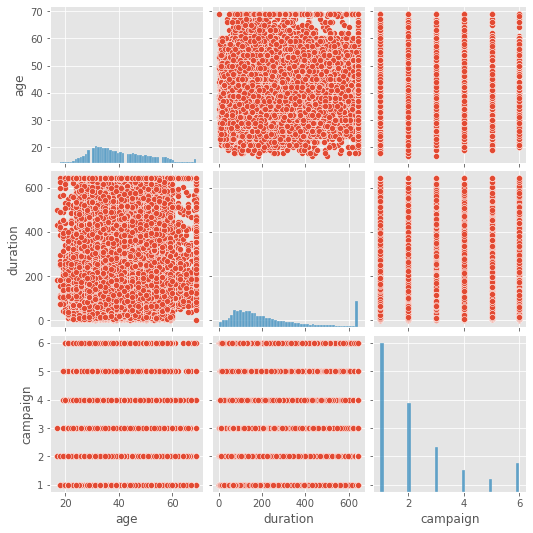

In [37]:
#age , duration , campaign
sns.pairplot(df)

Encoding 

Machine learning algorithm can only read numerical values. It is therefore essential to encode categorical features into numerical values

In [38]:
cat_var

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [39]:
#check categorical class 
for i in cat_var : 
    print(i,":",df[i].unique())

job : ['blue-collar' 'entrepreneur' 'retired' 'admin.' 'student' 'services'
 'technician' 'self-employed' 'management' 'unemployed' 'housemaid']
marital : ['married' 'divorced' 'single']
education : ['basic.9y' 'university.degree' 'basic.4y' 'high.school'
 'professional.course' 'basic.6y' 'illiterate']
default : ['no' 'yes']
housing : ['no' 'yes']
loan : ['no' 'yes']
contact : ['cellular' 'telephone']
month : ['nov' 'jul' 'may' 'jun' 'aug' 'mar' 'oct' 'apr' 'sep' 'dec']
day_of_week : ['wed' 'mon' 'tue' 'fri' 'thu']
poutcome : ['nonexistent' 'failure' 'success']
y : ['no' 'yes']


Features like job education month day_of_week has so many categories, we will Label Encode them as One Hot Encoding would create so many columns

In [40]:
#initializing label encoder
le = LabelEncoder()

#iterating through each categorical feature and label encoding them
for feature in cat_var:
    df[feature] = le.fit_transform(df[feature])
    
df.head()

age  job  marital  education  default  housing  loan  contact  month  \
0   49    1        1          2        0        0     0        0      7   
1   37    2        1          6        0        0     0        1      7   
2   69    5        1          0        0        0     0        0      3   
3   36    0        1          6        0        1     0        1      6   
4   59    5        0          6        0        0     0        0      4   

   day_of_week  duration  campaign  poutcome  y  
0            4       227         4         1  0  
1            4       202         2         0  0  
2            1       643         1         1  1  
3            1       120         2         1  0  
4            3       368         2         1  0

Separating independent and dependent variables

In [41]:
#feature variables 
X = df.drop(['y'],axis=1)

#target variable
Y = df['y']

In [42]:
#shape of X
print(X.shape)

#shape of Y
print(Y.shape)

(32950, 13)
(32950,)


In [43]:
X.head()

age  job  marital  education  default  housing  loan  contact  month  \
0   49    1        1          2        0        0     0        0      7   
1   37    2        1          6        0        0     0        1      7   
2   69    5        1          0        0        0     0        0      3   
3   36    0        1          6        0        1     0        1      6   
4   59    5        0          6        0        0     0        0      4   

   day_of_week  duration  campaign  poutcome  
0            4       227         4         1  
1            4       202         2         0  
2            1       643         1         1  
3            1       120         2         1  
4            3       368         2         1

In [44]:
Y.head()

0    0
1    0
2    1
3    0
4    0
Name: y, dtype: int32

Checking Correlation of feature variables


<AxesSubplot:>

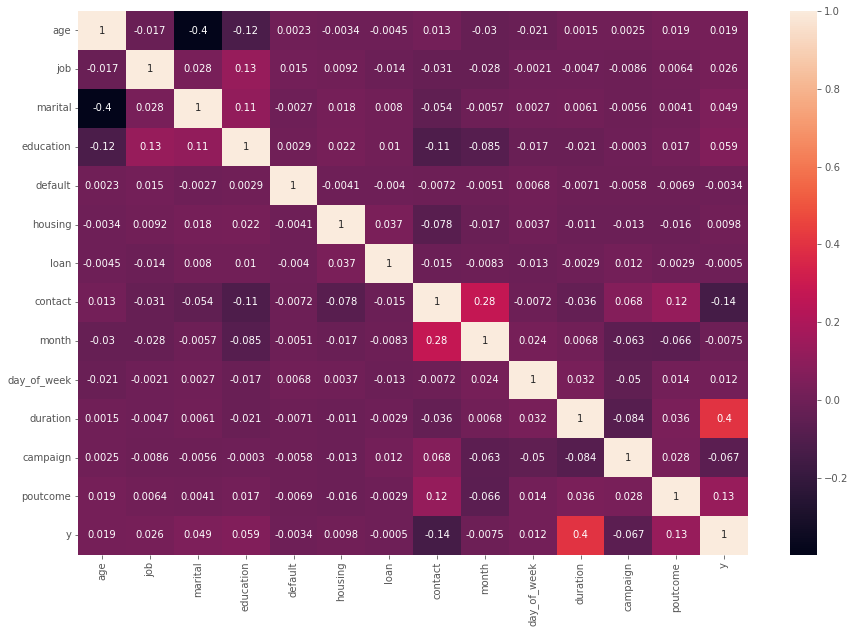

In [45]:
#correlation between variables
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

There are no features that are highly correlated and inversely correlated. If we had, we could have written the condition that if the correlation is higher than 0.8 (or can be any threshold value depending on the domain knowledge) and less than -0.8, we could have drop those features. Because those correlated features would have been doing the same job.

Handling imbalanced dataset

Since the class distribution in the target variable is ~89:11 indicating an imbalance dataset, we need to resample it.

In [46]:
#initializing oversample
smote = SMOTE(0.75)

#implementing oversampling to training data
X,Y = smote.fit_resample(X,Y)

#target class sample of resampled dataset
Y.value_counts()

0    29238
1    21928
Name: y, dtype: int64

In [47]:
print("percentage of NO and YES\n",Y.value_counts()/len(df)*100)

percentage of NO and YES
 0    88.734446
1    66.549317
Name: y, dtype: float64


Splitting resampled data in train and test data


In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

#print shape of all the values 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(38374, 13)
(12792, 13)
(38374,)
(12792,)


Now I will use algorithms to train my features for specific results and  predict the label

LOGISTIC REGRESSION

In [49]:
#initializing the classifier
lr = LogisticRegression()

#Fitting the data 
lr.fit(X_train,y_train)

#Checking the model performance
y_lr = lr.predict(X_test)
print(y_lr)

#Choosing the metrics for evaluation of the result
print("Accuracy Score : ",accuracy_score(y_test,y_lr)*100)

[0 0 0 ... 1 1 0]
Accuracy Score :  79.90931832395248


In [50]:
#confusion matrix
cm = confusion_matrix(y_test,y_lr)
cm

array([[6198, 1100],
       [1470, 4024]], dtype=int64)

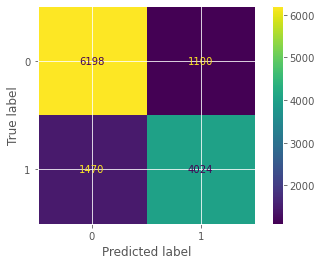

In [51]:
#plotting confusion matrix
plot_confusion_matrix(lr,X_test,y_test)

In [52]:
#classification report
print(classification_report(y_test,y_lr))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      7298
           1       0.79      0.73      0.76      5494

    accuracy                           0.80     12792
   macro avg       0.80      0.79      0.79     12792
weighted avg       0.80      0.80      0.80     12792



KNNEIGHBORS CLASSIFIER

In [53]:
#initializing the classifier
knn = KNeighborsClassifier()

#Fitting the data 
knn.fit(X_train,y_train)

#Checking the model performance
y_knn = knn.predict(X_test)
print(y_knn)

#Choosing the metrics for evaluation of the result
print("Accuracy Score : ",accuracy_score(y_test,y_knn)*100)

[0 0 0 ... 1 1 1]
Accuracy Score :  86.8980612883052


[[5796 1502]
 [ 174 5320]]


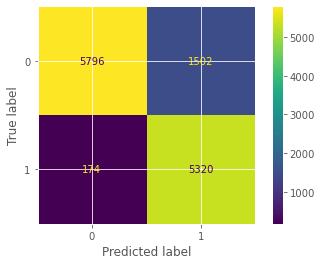

In [54]:
#confusion matrix
cm = confusion_matrix(y_test,y_knn)
print(cm)

#plotting confusion matrix
print(plot_confusion_matrix(knn,X_test,y_test))

In [55]:
#classification report
print(classification_report(y_test,y_knn))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87      7298
           1       0.78      0.97      0.86      5494

    accuracy                           0.87     12792
   macro avg       0.88      0.88      0.87     12792
weighted avg       0.89      0.87      0.87     12792



SUPPORT VECTOR MACHINE

In [56]:
#initializing the classifier
#svc = SVC()

#Fitting the data 
#svc.fit(X_train,y_train)

#Checking the model performance
#y_svc = svc.predict(X_test)
#print(y_svc)

#Choosing the metrics for evaluation of the result
#print("Accuracy Score : ",accuracy_score(y_test,y_svc)*100)

In [57]:
#confusion matrix
#cm = confusion_matrix(y_test,y_svc)
#print(cm)

#plotting confusion matrix
#print(plot_confusion_matrix(svc,X_test,y_test))    

In [58]:
#classification report 
#print(classification_report(y_test,y_svc))

DECISION TREE

In [59]:
#initializing the classifier
dt = DecisionTreeClassifier()

#Fitting the data 
dt.fit(X_train,y_train)

#Checking the model performance
y_dt = dt.predict(X_test)
print(y_dt)

#Choosing the metrics for evaluation of the result
print("Accuracy Score : ",accuracy_score(y_test,y_dt)*100)

[0 0 0 ... 1 1 1]
Accuracy Score :  87.60944340212633


[[6359  939]
 [ 646 4848]]


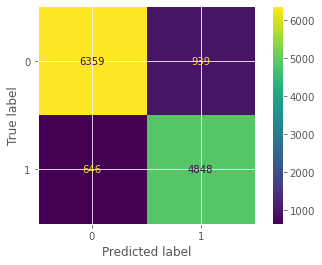

In [60]:
#confusion matrix
cm = confusion_matrix(y_test,y_dt)
print(cm)

#plotting confusion matrix
print(plot_confusion_matrix(dt,X_test,y_test))    

In [61]:
#classification report 
print(classification_report(y_test,y_dt))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      7298
           1       0.84      0.88      0.86      5494

    accuracy                           0.88     12792
   macro avg       0.87      0.88      0.87     12792
weighted avg       0.88      0.88      0.88     12792



RANDOM FOREST

In [62]:
#initializing the classifier
rf = RandomForestClassifier()

#Fitting the data 
rf.fit(X_train,y_train)

#Checking the model performance
y_rf = rf.predict(X_test)
print(y_rf)

#Choosing the metrics for evaluation of the result
print("Accuracy Score : ",accuracy_score(y_test,y_rf)*100)

[0 0 0 ... 1 1 1]
Accuracy Score :  91.23671044402751


[[6588  710]
 [ 411 5083]]


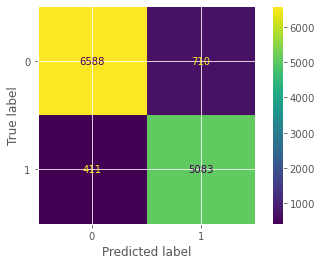

In [63]:
#confusion matrix
cm = confusion_matrix(y_test,y_rf)
print(cm)

#plotting confusion matrix
print(plot_confusion_matrix(rf,X_test,y_test))  

In [64]:
#classification report 
print(classification_report(y_test,y_rf))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      7298
           1       0.88      0.93      0.90      5494

    accuracy                           0.91     12792
   macro avg       0.91      0.91      0.91     12792
weighted avg       0.91      0.91      0.91     12792



ADA BOOST CLASSIFIER

In [65]:
#initializing the classifier
ad = AdaBoostClassifier()

#Fitting the data 
ad.fit(X_train,y_train)

#Checking the model performance
y_ad = ad.predict(X_test)
print(y_ad)

#Choosing the metrics for evaluation of the result
print("Accuracy Score : ",accuracy_score(y_test,y_ad)*100)

[0 0 0 ... 1 1 0]
Accuracy Score :  85.27986241400876


[[6395  903]
 [ 980 4514]]


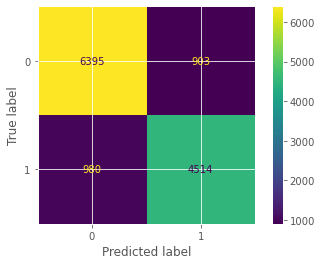

In [66]:
#confusion matrix
cm = confusion_matrix(y_test,y_ad)
print(cm)

#plotting confusion matrix
print(plot_confusion_matrix(ad,X_test,y_test)) 

In [67]:
#classification report 
print(classification_report(y_test,y_ad))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      7298
           1       0.83      0.82      0.83      5494

    accuracy                           0.85     12792
   macro avg       0.85      0.85      0.85     12792
weighted avg       0.85      0.85      0.85     12792



GRADIENT BOOST

In [68]:
#initializing the classifier
gbt = GradientBoostingClassifier()

#Fitting the data 
gbt.fit(X_train,y_train)

#Checking the model performance
y_gbt = gbt.predict(X_test)
print(y_gbt)

#Choosing the metrics for evaluation of the result
print("Accuracy Score : ",accuracy_score(y_test,y_gbt)*100)

[0 0 0 ... 1 1 0]
Accuracy Score :  86.6635397123202


[[6350  948]
 [ 758 4736]]


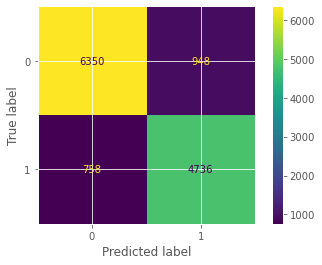

In [69]:
#confusion matrix
cm = confusion_matrix(y_test,y_gbt)
print(cm)

#plotting confusion matrix
print(plot_confusion_matrix(gbt,X_test,y_test)) 

In [70]:
#classification report 
print(classification_report(y_test,y_gbt))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      7298
           1       0.83      0.86      0.85      5494

    accuracy                           0.87     12792
   macro avg       0.86      0.87      0.86     12792
weighted avg       0.87      0.87      0.87     12792



Cross Validation Scores for all the models

In [71]:
#cross - validation scores

#Logistic Regression
cross_lr = cross_val_score(lr,X,Y,cv=5)
print("Logistic Regression  :" ,cross_lr.mean()*100)

#KNN-Neigbors Classifier
cross_knn = cross_val_score(knn,X,Y,cv=5)
print("KNN Neighbors : ",cross_knn.mean())

#Support Vector Classifier
#cross_svc = cross_val_score(svc,X,Y,cv=5)
#print("SVC : ",cross_svc.mean())

Logistic Regression  : 79.59203938882624
KNN Neighbors :  0.8765782096384264


In [72]:
#Decision Tree Classifier
cross_dt = cross_val_score(dt,X,Y,cv=5)
print("Decision Tree Classifier  : ",cross_dt.mean()*100)

#Random Forest
cross_rf = cross_val_score(rf,X,Y,cv=5)
print("Random Forest Classifier  : ",cross_rf.mean()*100)

#Gradient Boost
cross_gbt = cross_val_score(gbt,X,Y,cv=5)
print("Gradient Boost Classifier : ",cross_gbt.mean()*100)

#Ada Boost
cross_ad = cross_val_score(ad,X,Y,cv=5)
print("Ada Boost Classifier      :",cross_ad.mean()*100)

Decision Tree Classifier  :  87.25924554709354
Random Forest Classifier  :  90.65411251053503
Gradient Boost Classifier :  85.93220067406942
Ada Boost Classifier      : 84.46249523105965


Hyperparameter Tuning 

I am doing hyperparameter tuning on Logistic Regression Classifier and on Random Forest Classifier

In [73]:
#selecting the classifier
lr_log = LogisticRegression()

#selecting hyperparameter tuning parameters
log_param = {
    "C" : 10.0**np.arange(-2,3),
    "penalty" : ["l1","l2"]
 }

#defining KFold cross validation
cv_log = KFold(n_splits=5)

In [74]:
#using grid search for respective parameters
grid_search = GridSearchCV(lr_log,log_param,cv=cv_log,scoring="f1_macro",n_jobs=-1,verbose=2)

#fitting the model
grid_search.fit(X_train,y_train)

#printing the best scores and best parameters
print("Best score is   : ",grid_search.best_score_)
print("Best parameters : ",grid_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best score is   :  0.792061425599714
Best parameters :  {'C': 0.1, 'penalty': 'l2'}


In [75]:
#using logistic regression classifier using parameters C,penalty
model_log = LogisticRegression(C=10.0,penalty='l2')
model_log

model_log.fit(X_train,y_train)

y_p = model_log.predict(X_test)
print(y_p)

print(accuracy_score(y_test,y_p))

#classification report after doing hyperparameter tuning
print(classification_report(y_test,y_p))

#cross val score
model_cross = cross_val_score(model_log,X,Y,cv=5)
print("Cross Val Score is : ",model_cross.mean()*100)

[0 0 0 ... 1 1 0]
0.797373358348968
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      7298
           1       0.78      0.73      0.76      5494

    accuracy                           0.80     12792
   macro avg       0.79      0.79      0.79     12792
weighted avg       0.80      0.80      0.80     12792

Cross Val Score is :  79.65458939979693


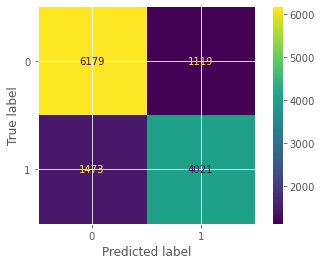

In [76]:
plot_confusion_matrix(model_log,X_test,y_test)

In [78]:
#Hyperparameter tuning for random forest classifier

#choosing best params for tuning the model
rf_param= { 
           "n_estimators": [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
           "max_features": ["auto", "sqrt", "log2"],
           "max_depth": [4,5,6,7,8],
           "min_samples_split": [5,10,15,100],
           "min_samples_leaf": [1,2,5,10],
           "criterion":['gini', 'entropy'] 
          }

#defining the Kfold for n_splits 
cv_rf = KFold(n_splits=5)

In [79]:
#using grid search for respective parameters
randomized_cv = RandomizedSearchCV(rf,rf_param,cv=cv_rf,scoring="f1_macro",n_jobs=-1,verbose=2)

#fitting the model
randomized_cv.fit(X_train,y_train)

#printing the best scores and best parameters
print("Best score is   : ",randomized_cv.best_score_)
print("Best parameters : ",randomized_cv.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best score is   :  0.8419572256390815
Best parameters :  {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 8, 'criterion': 'entropy'}


In [82]:
#using random forest classifier using the best parameters 
model_rf = RandomForestClassifier(n_estimators=300,min_samples_split=10,min_samples_leaf=10, 
                                  max_features='log2',max_depth=8,criterion='entropy')
model_rf

model_rf.fit(X_train,y_train)

y_model_rf = model_rf.predict(X_test)
print(y_model_rf)

print(accuracy_score(y_test,y_model_rf)*100)

#classification report after doing hyperparameter tuning
print(classification_report(y_test,y_model_rf))

#cross val score
model_cross_rf = cross_val_score(model_rf,X,Y,cv=5)
print("Cross Val Score is : ",model_cross_rf.mean()*100)

[0 0 0 ... 1 1 0]
84.23233270794246
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      7298
           1       0.80      0.84      0.82      5494

    accuracy                           0.84     12792
   macro avg       0.84      0.84      0.84     12792
weighted avg       0.84      0.84      0.84     12792

Cross Val Score is :  83.34650274173609


EDA

In [83]:
#import libraries to speed up exploratory data analysis
import pandas_profiling
from pandas_profiling import ProfileReport

In [84]:
pp = ProfileReport(df)
pp

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [85]:
#Saving the model using the pickle library
import pickle

In [86]:
file = "Banking.pkl"
pickle.dump(rf,open(file,'wb'))